# **Bank loan case study project**

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

**Loading the Data**



In [101]:
app_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank loan case study project./application_data.csv')
prev_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank loan case study project./previous_application.csv')

In [102]:
app_data.shape

(49999, 122)

In [103]:
prev_data.shape

(49999, 37)

In [104]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [105]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 46.5+ MB


In [107]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   49999 non-null  int64  
 1   SK_ID_CURR                   49999 non-null  int64  
 2   NAME_CONTRACT_TYPE           49999 non-null  object 
 3   AMT_ANNUITY                  39407 non-null  float64
 4   AMT_APPLICATION              49999 non-null  float64
 5   AMT_CREDIT                   49999 non-null  float64
 6   AMT_DOWN_PAYMENT             24801 non-null  float64
 7   AMT_GOODS_PRICE              39255 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   49999 non-null  object 
 9   HOUR_APPR_PROCESS_START      49999 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  49999 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       49999 non-null  int64  
 12  RATE_DOWN_PAYMENT            24801 non-null  float64
 13  RATE_INTEREST_PR

In [108]:
null_data = app_data.isnull().sum()/49999*100

In [109]:
null_data

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.002000
AMT_GOODS_PRICE                  0.076002
NAME_TYPE_SUITE                  0.384008
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.901318
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [110]:
drop_col = null_data[null_data >= 30].index
drop_col

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [111]:
app_data_nonull = app_data.drop(columns= drop_col)

In [112]:
app_data_nonull.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
app_data_nonull.shape

(49999, 72)

In [114]:
app_data_nonull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   49999 non-null  int64  
 1   TARGET                       49999 non-null  int64  
 2   NAME_CONTRACT_TYPE           49999 non-null  object 
 3   CODE_GENDER                  49999 non-null  object 
 4   FLAG_OWN_CAR                 49999 non-null  object 
 5   FLAG_OWN_REALTY              49999 non-null  object 
 6   CNT_CHILDREN                 49999 non-null  int64  
 7   AMT_INCOME_TOTAL             49999 non-null  float64
 8   AMT_CREDIT                   49999 non-null  float64
 9   AMT_ANNUITY                  49998 non-null  float64
 10  AMT_GOODS_PRICE              49961 non-null  float64
 11  NAME_TYPE_SUITE              49807 non-null  object 
 12  NAME_INCOME_TYPE             49999 non-null  object 
 13  NAME_EDUCATION_T

In [115]:
# Columns that we do no require for this analysis.

app_data_nonull.drop(columns = ['FLAG_MOBIL',	'FLAG_EMP_PHONE',	'FLAG_WORK_PHONE',	'FLAG_CONT_MOBILE',	'FLAG_PHONE',
                                'FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',	'LIVE_REGION_NOT_WORK_REGION',
                                'REG_CITY_NOT_LIVE_CITY',	'REG_CITY_NOT_WORK_CITY',	'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2',
                                'EXT_SOURCE_3',	'OBS_30_CNT_SOCIAL_CIRCLE',	'DEF_30_CNT_SOCIAL_CIRCLE',	'OBS_60_CNT_SOCIAL_CIRCLE',
                                'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2',	'FLAG_DOCUMENT_3',	'FLAG_DOCUMENT_4',	'FLAG_DOCUMENT_5',
                                'FLAG_DOCUMENT_6',	'FLAG_DOCUMENT_7',	'FLAG_DOCUMENT_8',	'FLAG_DOCUMENT_9',	'FLAG_DOCUMENT_10',
                                'FLAG_DOCUMENT_11',	'FLAG_DOCUMENT_12',	'FLAG_DOCUMENT_13',	'FLAG_DOCUMENT_14',	'FLAG_DOCUMENT_15',
                                'FLAG_DOCUMENT_16',	'FLAG_DOCUMENT_17',	'FLAG_DOCUMENT_18',	'FLAG_DOCUMENT_19',	'FLAG_DOCUMENT_20',
                                'FLAG_DOCUMENT_21'], inplace = True)

In [116]:
app_data_nonull.shape

(49999, 34)

In [117]:
# converting negative values into positive if required
negv = ['DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION',	'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']

app_data_nonull[negv] = app_data_nonull[negv].abs()

In [118]:
app_data_nonull.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,2.0,1,1,MONDAY,11,School,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1.0,2,2,MONDAY,9,Government,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1.0,2,2,THURSDAY,11,Religion,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
null_data1 = prev_data.isnull().sum()/49999*100

In [120]:
null_data1

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.184424
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               50.397008
AMT_GOODS_PRICE                21.488430
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              50.397008
RATE_INTEREST_PRIMARY          99.669993
RATE_INTEREST_PRIVILEGED       99.669993
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                48.486970
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [121]:
drop_col1 = null_data1[null_data1 >=30].index
drop_col1

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [122]:
prev_data_nonull = prev_data.drop(columns= drop_col1)

In [123]:
prev_data_nonull.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [124]:
prev_data_nonull.shape

(49999, 26)

In [125]:
# Columns that we do no require for this analysis
prev_data_nonull.drop(columns = ['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','NAME_SELLER_INDUSTRY','NAME_PORTFOLIO'],
                      inplace = True)


In [126]:
prev_data_nonull.shape

(49999, 21)

In [127]:
prev_data_nonull.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,XNA,Country-wide,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,XNA,Approved,-164,XNA,XAP,Repeater,XNA,x-sell,Contact center,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,x-sell,Credit and cash offices,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,x-sell,Credit and cash offices,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,walk-in,Credit and cash offices,24.0,high,Cash Street: high


In [128]:
# converting negative values into positive if required
prev_data_nonull['DAYS_DECISION'] = prev_data_nonull['DAYS_DECISION'].abs()

In [129]:
prev_data_nonull.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PRODUCT_TYPE,CHANNEL_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,XNA,Country-wide,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,XNA,Approved,164,XNA,XAP,Repeater,XNA,x-sell,Contact center,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,x-sell,Credit and cash offices,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,x-sell,Credit and cash offices,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,walk-in,Credit and cash offices,24.0,high,Cash Street: high


# ***Dealing with null values(less then 30 %)***

In [130]:
app_data_nonull.isnull().sum().sort_values(ascending = True)



SK_ID_CURR                        0
ORGANIZATION_TYPE                 0
HOUR_APPR_PROCESS_START           0
WEEKDAY_APPR_PROCESS_START        0
REGION_RATING_CLIENT_W_CITY       0
REGION_RATING_CLIENT              0
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
NAME_EDUCATION_TYPE               0
REGION_POPULATION_RELATIVE        0
FLAG_OWN_CAR                      0
AMT_CREDIT                        0
AMT_INCOME_TOTAL                  0
CNT_CHILDREN                      0
FLAG_OWN_REALTY                   0
NAME_INCOME_TYPE                  0
CODE_GENDER                       0
NAME_CONTRACT_TYPE                0
TARGET                            0
DAYS_LAST_PHONE_CHANGE            1
AMT_ANNUITY                       1
CNT_FAM_MEMBERS                   1
AMT_GOODS_PRICE                  38
NAME_TYPE_SUITE             

In [131]:
## dealing with DAYS_LAST_PHONE_CHANGE
app_data_nonull['DAYS_LAST_PHONE_CHANGE'].describe()

count    49998.000000
mean       964.296172
std        829.485574
min          0.000000
25%        270.000000
50%        755.000000
75%       1573.000000
max       4002.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [132]:
app_data_nonull['DAYS_LAST_PHONE_CHANGE'].head(20)


0     1134.0
1      828.0
2      815.0
3      617.0
4     1106.0
5     2536.0
6     1562.0
7     1070.0
8        0.0
9     1673.0
10     844.0
11    2396.0
12    2370.0
13       4.0
14     188.0
15     925.0
16       3.0
17    2811.0
18     239.0
19    1850.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [133]:
# filling the null with mean
app_data_nonull['DAYS_LAST_PHONE_CHANGE'].fillna(964, inplace = True)

In [134]:
app_data_nonull['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [135]:
## dealing with AMT_ANNUITY
app_data_nonull['AMT_ANNUITY'].describe()

count     49998.000000
mean      27107.377355
std       14562.944435
min        2052.000000
25%       16456.500000
50%       24939.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [136]:
app_data_nonull['AMT_ANNUITY'].head()

0    24700.5
1    35698.5
2     6750.0
3    29686.5
4    21865.5
Name: AMT_ANNUITY, dtype: float64

In [137]:
app_data_nonull['AMT_ANNUITY'].median()

24939.0

In [138]:
# replacing null with median
app_data_nonull['AMT_ANNUITY'].fillna(24939.0, inplace = True)

In [139]:
app_data_nonull['AMT_ANNUITY'].isnull().sum()

0

In [140]:
## dealing with CNT_FAM_MEMBERS
app_data_nonull['CNT_FAM_MEMBERS'].describe()

count    49998.000000
mean         2.158946
std          0.911332
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [141]:
app_data_nonull['CNT_FAM_MEMBERS'].mode()

0    2.0
Name: CNT_FAM_MEMBERS, dtype: float64

In [142]:
# replacing the null with mode
app_data_nonull['CNT_FAM_MEMBERS'].fillna(2, inplace = True)

In [143]:
app_data_nonull['CNT_FAM_MEMBERS'].isnull().sum()

0

In [144]:
## dealing with AMT_GOODS_PRICE
app_data_nonull['AMT_GOODS_PRICE'].describe()

count    4.996100e+04
mean     5.390600e+05
std      3.698533e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [145]:
app_data_nonull['AMT_GOODS_PRICE'].head()

0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [146]:
# replacing null with mean
m = app_data_nonull['AMT_GOODS_PRICE'].mean()
app_data_nonull['AMT_GOODS_PRICE'].fillna(m, inplace = True)

In [147]:
app_data_nonull['AMT_GOODS_PRICE'].isnull().sum()

0

In [148]:
# Dealing with NAME_TYPE_SUITE
app_data_nonull['NAME_TYPE_SUITE'].head()

0    Unaccompanied
1           Family
2    Unaccompanied
3    Unaccompanied
4    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [149]:
app_data_nonull['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [150]:
# Replacing null with mode(Unaccompanied)
app_data_nonull['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace = True)

In [151]:
app_data_nonull['NAME_TYPE_SUITE'].isnull().sum()

0

In [152]:
app_data_nonull.isnull().sum().sort_values(ascending = True)

SK_ID_CURR                        0
DAYS_LAST_PHONE_CHANGE            0
ORGANIZATION_TYPE                 0
HOUR_APPR_PROCESS_START           0
WEEKDAY_APPR_PROCESS_START        0
REGION_RATING_CLIENT_W_CITY       0
REGION_RATING_CLIENT              0
CNT_FAM_MEMBERS                   0
DAYS_ID_PUBLISH                   0
DAYS_REGISTRATION                 0
DAYS_EMPLOYED                     0
DAYS_BIRTH                        0
NAME_HOUSING_TYPE                 0
NAME_FAMILY_STATUS                0
REGION_POPULATION_RELATIVE        0
NAME_INCOME_TYPE                  0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
NAME_EDUCATION_TYPE               0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
FLAG_OWN_CAR                      0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                   0
AMT_INCOME_TOTAL            

In [153]:
# droping rows which consist NA
app_data_nonull.dropna(inplace = True)

In [154]:
app_data_nonull.shape

(43265, 34)

In [155]:
app_data_nonull.isnull().sum().sort_values(ascending = True)

SK_ID_CURR                     0
AMT_REQ_CREDIT_BUREAU_MON      0
AMT_REQ_CREDIT_BUREAU_WEEK     0
AMT_REQ_CREDIT_BUREAU_DAY      0
AMT_REQ_CREDIT_BUREAU_HOUR     0
DAYS_LAST_PHONE_CHANGE         0
ORGANIZATION_TYPE              0
HOUR_APPR_PROCESS_START        0
WEEKDAY_APPR_PROCESS_START     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
CNT_FAM_MEMBERS                0
DAYS_ID_PUBLISH                0
DAYS_REGISTRATION              0
DAYS_EMPLOYED                  0
DAYS_BIRTH                     0
REGION_POPULATION_RELATIVE     0
NAME_HOUSING_TYPE              0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_REQ_CREDIT_BUREAU_QRT      0
AMT_INCOME_TOTAL               0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCA

In [156]:
# # prev_data
prev_data_nonull.isnull().sum().sort_values(ascending = True)

SK_ID_PREV                        0
CHANNEL_TYPE                      0
NAME_PRODUCT_TYPE                 0
NAME_GOODS_CATEGORY               0
NAME_CLIENT_TYPE                  0
CODE_REJECT_REASON                0
NAME_PAYMENT_TYPE                 0
DAYS_DECISION                     0
NAME_YIELD_GROUP                  0
NAME_CONTRACT_STATUS              0
HOUR_APPR_PROCESS_START           0
WEEKDAY_APPR_PROCESS_START        0
AMT_CREDIT                        0
AMT_APPLICATION                   0
NAME_CONTRACT_TYPE                0
SK_ID_CURR                        0
NAME_CASH_LOAN_PURPOSE            0
PRODUCT_COMBINATION               8
AMT_ANNUITY                   10592
CNT_PAYMENT                   10592
AMT_GOODS_PRICE               10744
dtype: int64

In [157]:
prev_data_nonull.shape

(49999, 21)

In [158]:
prev_data_nonull['PRODUCT_COMBINATION'].describe()

count                           49991
unique                             17
top       POS household with interest
freq                             8510
Name: PRODUCT_COMBINATION, dtype: object

In [159]:
prev_data_nonull['PRODUCT_COMBINATION'].head()


0    POS mobile with interest
1            Cash X-Sell: low
2           Cash X-Sell: high
3         Cash X-Sell: middle
4           Cash Street: high
Name: PRODUCT_COMBINATION, dtype: object

In [160]:
prev_data_nonull['PRODUCT_COMBINATION'].mode()

0    POS household with interest
Name: PRODUCT_COMBINATION, dtype: object

In [161]:
# Replacing null with Mode(POS household with interest)
prev_data_nonull['PRODUCT_COMBINATION'].fillna('POS household with interest', inplace = True)

In [162]:
prev_data_nonull['PRODUCT_COMBINATION'].isnull().sum()

0

In [163]:
# droping rows which consist na
prev_data_nonull.dropna(inplace = True)

In [164]:
prev_data_nonull.shape

(37999, 21)

In [165]:
app_data_nonull.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,2.0,1,1,MONDAY,11,School,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,1.0,2,2,MONDAY,9,Government,815.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,1.0,2,2,THURSDAY,11,Religion,1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970,477,2.0,2,2,WEDNESDAY,16,Other,2536.0,0.0,0.0,0.0,0.0,1.0,1.0


# ***Outliers detection and removal***

***APP DATA***

In [166]:
#  Creating a function to detect outliers using box plot
def box_plot(df, col):
  df.boxplot(column = [col])
  plt.grid(False)
  plt.show()


In [167]:
# Creating a function to detect outliers
def outliers(df, col):
  sorted(df[col])
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  Lower_bound = Q1 - 1.5 * IQR
  Upper_bound = Q3 + 1.5 * IQR
  df['OL'] = np.where(df[col]< Lower_bound, 0,
             np.where(df[col]> Upper_bound,0,1))
  return df['OL']


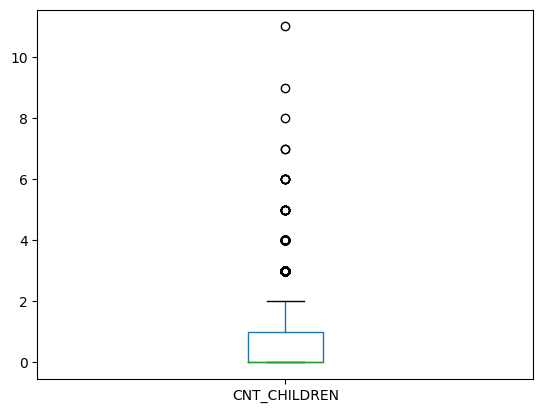

In [168]:
# creating a box plot of all numarical columns to detect outliers
box_plot(app_data_nonull,'CNT_CHILDREN')

In [169]:
# Finding out the number of Outlier present in CNT_CHILDREN
count_OL = app_data_nonull[outliers(app_data_nonull,'CNT_CHILDREN') == 0]
count_OL['OL'].head()

91     0
92     0
144    0
180    0
182    0
Name: OL, dtype: int64

In [ ]:
app_data_nonull.drop()

In [170]:
count_OL['OL'].count()

629

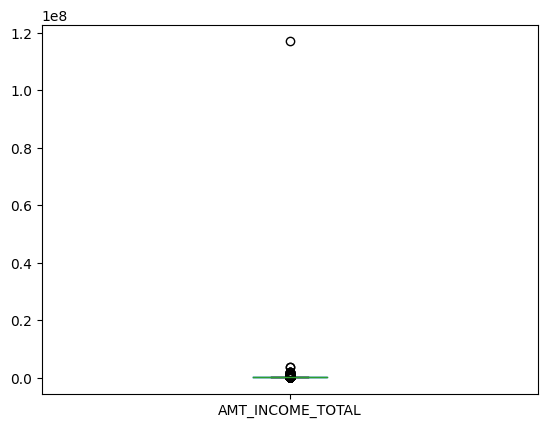

In [171]:
box_plot(app_data_nonull,'AMT_INCOME_TOTAL')

In [172]:
count_OL = app_data_nonull[outliers(app_data_nonull,'AMT_INCOME_TOTAL') == 0]
count_OL['OL'].count()

2069

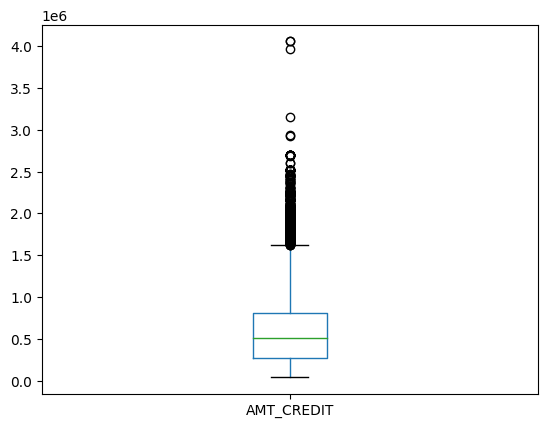

In [173]:
box_plot(app_data_nonull,'AMT_CREDIT')

In [174]:
count_OL = app_data_nonull[outliers(app_data_nonull,'AMT_CREDIT') == 0]
count_OL['OL'].count()

932

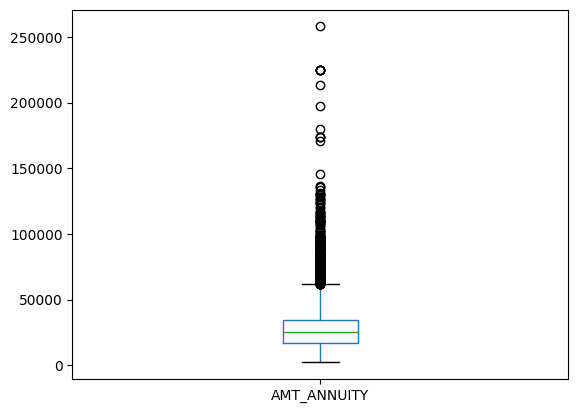

In [175]:
box_plot(app_data_nonull,'AMT_ANNUITY')

In [176]:
count_OL = app_data_nonull[outliers(app_data_nonull,'AMT_ANNUITY') == 0]
count_OL['OL'].count()

962

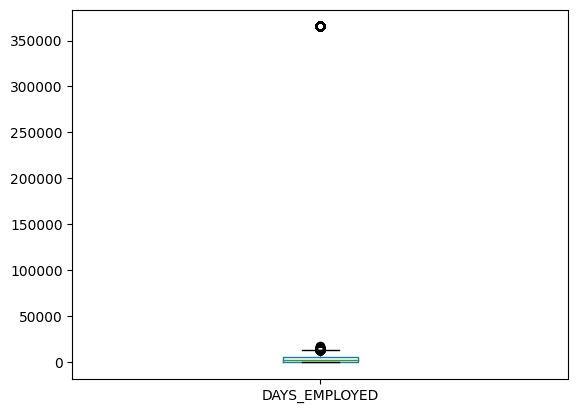

In [177]:
box_plot(app_data_nonull,'DAYS_EMPLOYED')

In [178]:
count_OL = app_data_nonull[outliers(app_data_nonull,'DAYS_EMPLOYED') == 0]
count_OL['OL'].count()

7776

***PREV DATA***

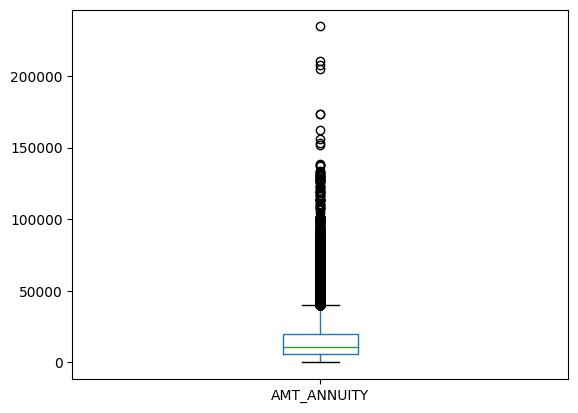

In [179]:
box_plot(prev_data_nonull,'AMT_ANNUITY')

In [180]:
count_OL = prev_data_nonull[outliers(prev_data_nonull,'AMT_ANNUITY') == 0]
count_OL.loc[:,['AMT_ANNUITY','OL']].head()

,AMT_ANNUITY,OL
3,47041.335,0
47,75897.630,0
55,47407.500,0
56,49299.435,0
79,58021.695,0


In [181]:
count_OL['OL'].count()

2621

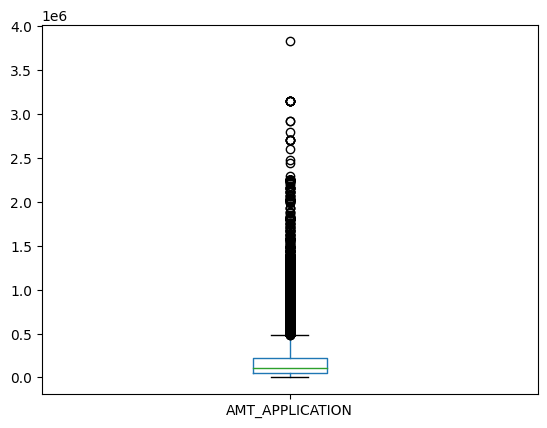

In [182]:
box_plot(prev_data_nonull,'AMT_APPLICATION')

In [183]:
count_OL = prev_data_nonull[outliers(prev_data_nonull,'AMT_APPLICATION') == 0]
count_OL['OL'].count()

4181

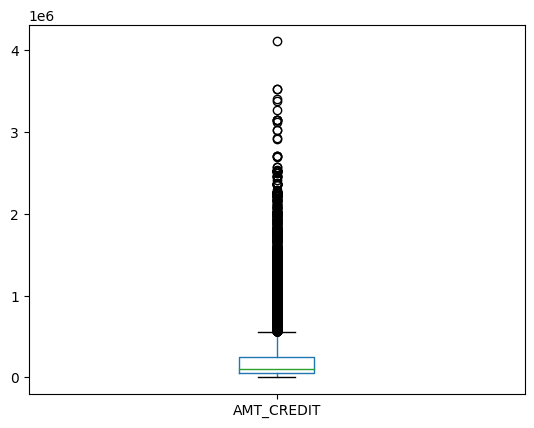

In [184]:
box_plot(prev_data_nonull,'AMT_CREDIT')

In [185]:
count_OL = prev_data_nonull[outliers(prev_data_nonull,'AMT_CREDIT') == 0]
count_OL['OL'].count()

4102

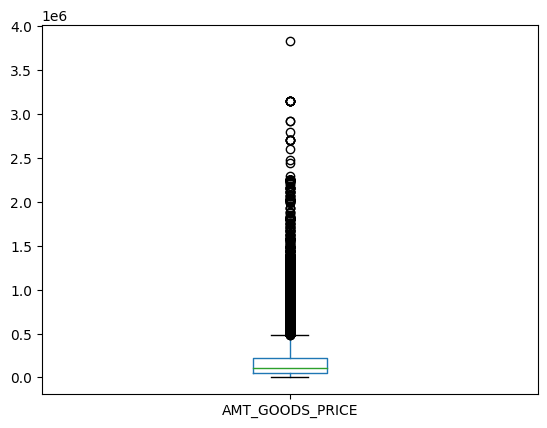

In [186]:
box_plot(prev_data_nonull,'AMT_GOODS_PRICE')

In [187]:
count_OL = prev_data_nonull[outliers(prev_data_nonull,'AMT_GOODS_PRICE') == 0]
count_OL['OL'].count()

4183

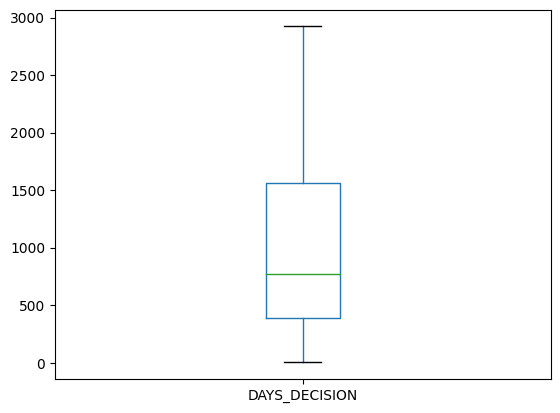

In [188]:
box_plot(prev_data_nonull,'DAYS_DECISION')

In [189]:
count_OL = prev_data_nonull[outliers(prev_data_nonull,'DAYS_DECISION') == 0]
count_OL['OL'].count()

0

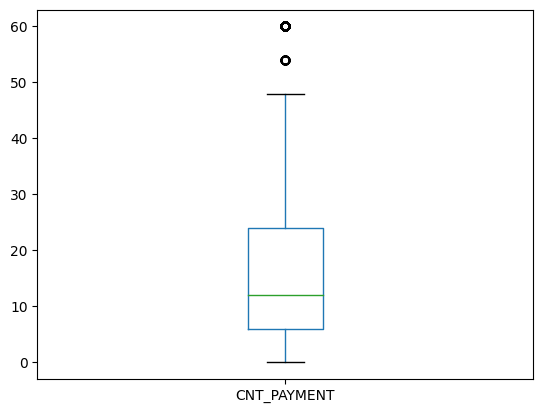

In [190]:
box_plot(prev_data_nonull,'CNT_PAYMENT')

In [191]:
count_OL = prev_data_nonull[outliers(prev_data_nonull,'CNT_PAYMENT') == 0]
count_OL['OL'].count()

1521

# ***DATA Imbalance***

In [192]:
count = app_data_nonull['TARGET'].count()
perc_1 = len(app_data_nonull[app_data_nonull['TARGET']==1])/count*100
perc_0 = len(app_data_nonull[app_data_nonull['TARGET']==0])/count*100
print('0 = ', round((perc_0),2),'%')
print('1 =' ,round((perc_1),2),'%')

0 =  92.28 %
1 = 7.72 %


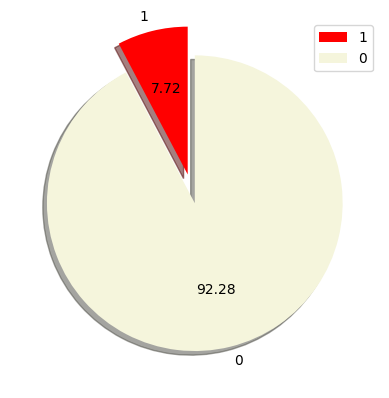

In [193]:
pie = (perc_1,perc_0)
Label = ['1','0']
colour = ['r','beige']
plt.pie(pie, labels = Label, explode = [0.2,0.0], shadow = True , colors = colour,startangle=90, autopct='%.2f' )
plt.legend()
plt.show()

In [194]:
imbalance_ratio = len(app_data_nonull[app_data_nonull['TARGET']==0])/len(app_data_nonull[app_data_nonull['TARGET']==1])
"Imbalance_Ratio: ", imbalance_ratio

('Imbalance_Ratio: ', 11.953592814371257)

In [195]:
imbalance_ratio = len(app_data_nonull[app_data_nonull['TARGET']==0])/len(app_data_nonull[app_data_nonull['TARGET']==1])
"Imbalance_Ratio : 1:{:.2f}".format(imbalance_ratio)

'Imbalance_Ratio : 1:11.95'

In [196]:
app_data_nonull.to_csv('Application_data.csv')